In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns

In [46]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

In [48]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,8)

In [5]:
data = pd.read_csv('movies.csv')

In [6]:
df = pd.DataFrame(data)

In [99]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctdate
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,1980
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,1980
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,1980
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,1980
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,1980


In [8]:
# to see if data is missing

for col in df.columns:
    print(np.mean(df[col].isnull()))
    

0.0
0.010041731872717789
0.0
0.0
0.0002608242044861763
0.0003912363067292645
0.0003912363067292645
0.0
0.0003912363067292645
0.00013041210224308815
0.0003912363067292645
0.2831246739697444
0.02464788732394366
0.002217005738132499
0.0005216484089723526


In [9]:
#To remove nulls in the DF
df.dropna(inplace=True)

In [100]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctdate
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,1980
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,1980
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,1980
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,1980
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,1980


In [11]:
for col in df.columns:
    pct = (np.mean(df[col].isnull()))
    print("{} - {} ".format(col,pct))

name - 0.0 
rating - 0.0 
genre - 0.0 
year - 0.0 
released - 0.0 
score - 0.0 
votes - 0.0 
director - 0.0 
writer - 0.0 
star - 0.0 
country - 0.0 
budget - 0.0 
gross - 0.0 
company - 0.0 
runtime - 0.0 


In [12]:
#datatype of the columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [13]:
#Change Data type of collumns
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

In [101]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctdate
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,1980
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,1980
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,1980
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,1980
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,1980


In [16]:
#correct year
df['correctdate']=df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [102]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctdate
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,1980
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,1980
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,1980
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,1980
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,1980


In [103]:
#order
df.sort_values(by='gross',inplace=False,ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctdate
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,2009
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,2019
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,1997
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,2015
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,2018


In [19]:
#to see all the rows
pd.set_option('display.max_rows',None)

In [20]:
#to drop duplicates
df.drop_duplicates(inplace=True)

In [104]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctdate
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,1980
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,1980
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,1980
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,1980
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,1980


D:\College\Anaconda-Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Budget vs Revenue')

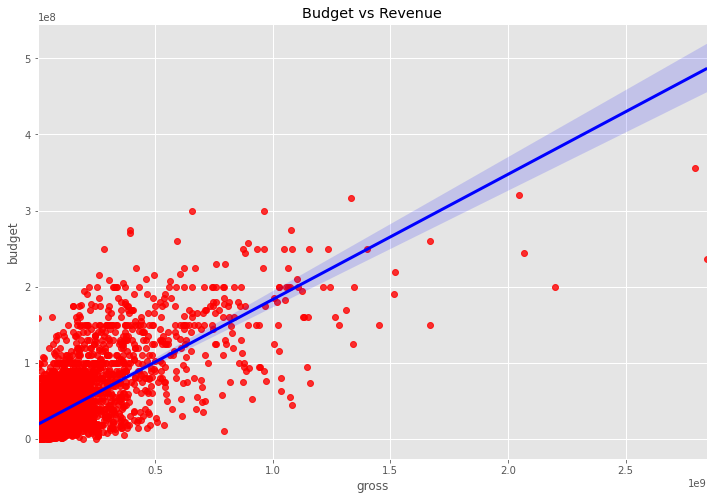

In [49]:
sns.regplot(df['gross'],df['budget'],scatter_kws={'color':'red'},line_kws={'color':'blue'})

plt.title("Budget vs Revenue")

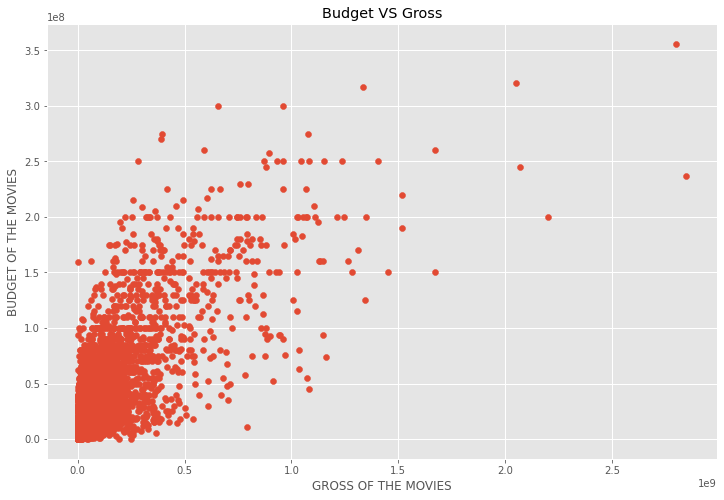

In [50]:
plt.scatter(x='gross',y='budget',data=df)
plt.xlabel("GROSS OF THE MOVIES")
plt.ylabel("BUDGET OF THE MOVIES")
plt.title("Budget VS Gross")
plt.show()

In [51]:
#To find the correlation amount
df.corr()

,year,score,votes,budget,gross,runtime,correctdate
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
correctdate,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


<AxesSubplot:>

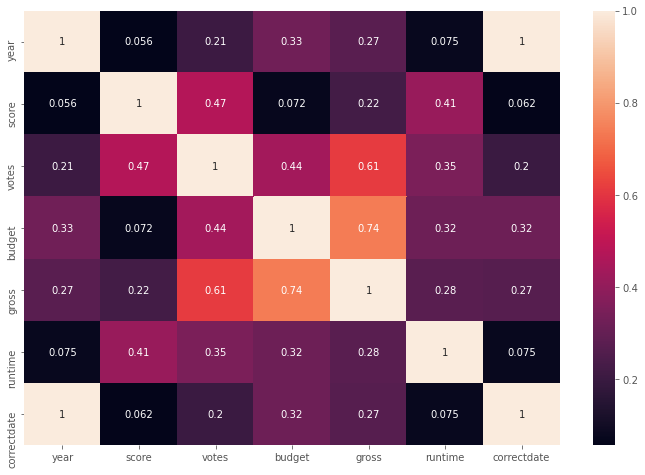

In [55]:
#Heatmap of the Correlation 
sns.heatmap(df.corr(),annot=True)

In [56]:
#to convert the Non Numerical Columns to numerical values for Correlation 
dc=df
for col in dc:
    if dc[col].dtype == 'object':
        dc[col]=dc[col].astype('category')
        dc[col]=dc[col].cat.codes

In [105]:
dc.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctdate
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,1980
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,1980
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,1980
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,1980
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,1980


<AxesSubplot:>

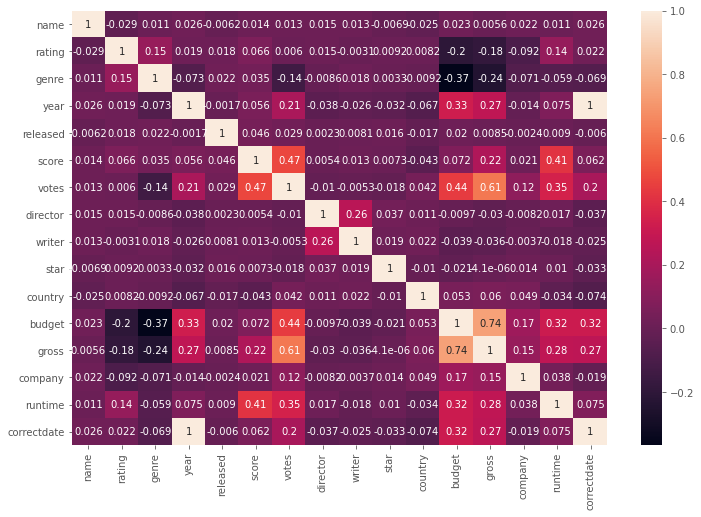

In [58]:
#Heatmap of the Correlation 
sns.heatmap(dc.corr(),annot=True)

In [67]:
#To order this in a numerical format
ordered_set = dc.corr().unstack()


In [75]:
sorted_val = ordered_set.sort_values()
Sorted_corr= sorted_val.sort_values(ascending=False)

In [107]:
Sorted_corr

correctdate  correctdate    1.000000
director     director       1.000000
name         name           1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
company      company        1.000000
votes        votes          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
score        score          1.000000
runtime      runtime        1.000000
correctdate  year           0.998726
year         correctdate    0.998726
budget       gross          0.740247
gross        budget         0.740247
votes        gross          0.614751
gross        votes          0.614751
votes        score          0.474256
score        votes          0.474256
budget       votes          0.439675
votes        budget         0.439675
runtime      score          0.414068
s

In [77]:
Correlation= pd.DataFrame(Sorted_corr)

In [96]:
Correlation=Correlation[Correlation[0]>0.5]

In [98]:
Correlation[Correlation[0]<1]

,,0
correctdate,year,0.998726
year,correctdate,0.998726
budget,gross,0.740247
gross,budget,0.740247
votes,gross,0.614751
gross,votes,0.614751


In [ ]:
#We can see the highly corelated collumns in the data.